## Gaussian Mixture Model - Sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Base de dados:

In [2]:
D = 2

s = 4

K = 2

mu1 = np.array([0, 0])

mu2 = np.array([s, s])

In [3]:
N = 2000

X = np.zeros((N, D))

X[:int(N/2), :] = np.random.randn(int(N/2), D)*2 + mu1

X[int(N/2):, :] = np.random.randn(int(N/2), D) + mu2

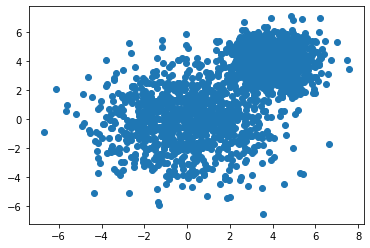

In [4]:
plt.scatter(X[:,0], X[:,1])

plt.show()

## Gaussian Mixture

In [5]:
GMM = GaussianMixture(n_components = 2)

In [6]:
clusters = GMM.fit(X)

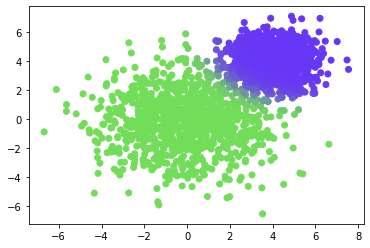

In [7]:
random_colors = np.random.random((K, 3))
colors = clusters.predict_proba(X).dot(random_colors)
plt.scatter(X[:,0], X[:,1], c=colors)
plt.show()

## API

In [8]:
novo_dado = np.array([6, 4]).reshape(1, -1)

In [9]:
print(clusters.predict(novo_dado))

[1]


In [10]:
print(clusters.predict_proba(novo_dado))

[[0.00189675 0.99810325]]


## Medida de erro - Função AIC

In [11]:
print(GMM.aic(X))

16638.99970543568


## Simulação do número de clusters

Text(0, 0.5, 'AIC Function')

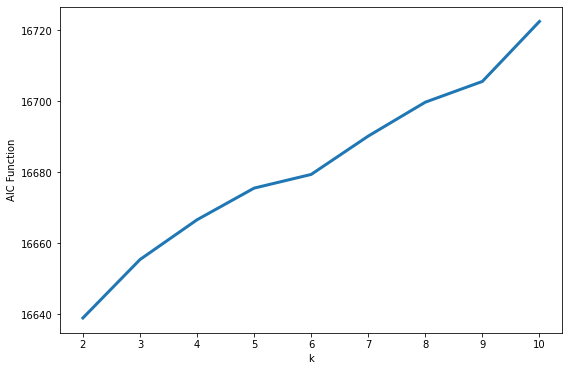

In [12]:
n_clusters = 11
k = np.zeros(n_clusters)
AIC = np.zeros(n_clusters)

for i in range(2, n_clusters):
    GMM = GaussianMixture(n_components = i)
    GMM.fit(X)
    k[i] = i
    AIC[i] = GMM.aic(X)

plt.figure(figsize=(9, 6))
plt.plot(k[2:],AIC[2:],linewidth=3.0)
plt.xlabel('k')
plt.ylabel('AIC Function')